<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
EVENT_VARIABLES = ['CHILD_DISORDER', 'DEATH_CHILD', 'DEATH_FATHER',
                   'DEATH_HH_PERSON', 'DEATH_MOTHER', 'DEATH_PARTNER',
                   'DIVORCED', 'HH_COMP_CHANGE', 'LAST_JOB_ENDED',
                   'LAST_JOB_ENDED_LIMITED', 'LEGALLY_HANDICAPPED_PERC',
                   'PREGNANCY_UNPLANNED', 'SEPARATED']

CONTROLS = ['AGE', 'EDUCATION_GROUPS_ISCED97', 'GENDER', 
            'HH_NET_INCOME_YEAR', 'MARITAL_STATUS',
            'MIGRATION_STATUS', ]

def inspect(df, event, row_cond=None):
    related_columns = [i for i in df if event in i]
    if row_cond is None:
        return df.loc[:, ['ID', 'YEAR', 'MIGRATION_STATUS'] + related_columns]
    else:
        return df.loc[row_cond, ['ID', 'YEAR', 'MIGRATION_STATUS'] + related_columns]

In [3]:
df = pd.read_pickle('../../bld/out/data/panel.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21371 entries, 0 to 9340
Data columns (total 63 columns):
AGE                                              21371 non-null int64
EDUCATION_GROUPS_ISCED97                         21371 non-null category
EMPLOYMENT_STATUS                                21371 non-null category
EVENT_CHILD_DISORDER_COUNT                       21371 non-null float64
EVENT_CHILD_DISORDER_COUNT_PREVIOUS              21371 non-null float64
EVENT_CHILD_DISORDER_TIME_DIFF                   21371 non-null float64
EVENT_DEATH_CHILD_COUNT                          21371 non-null float64
EVENT_DEATH_CHILD_COUNT_PREVIOUS                 21371 non-null float64
EVENT_DEATH_CHILD_TIME_DIFF                      21371 non-null float64
EVENT_DEATH_FATHER_COUNT                         21371 non-null float64
EVENT_DEATH_FATHER_COUNT_PREVIOUS                21371 non-null float64
EVENT_DEATH_FATHER_TIME_DIFF                     21371 non-null float64
EVENT_DEATH_HH_PERSON_COUNT 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8109CBC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C811A71F60>]], dtype=object)

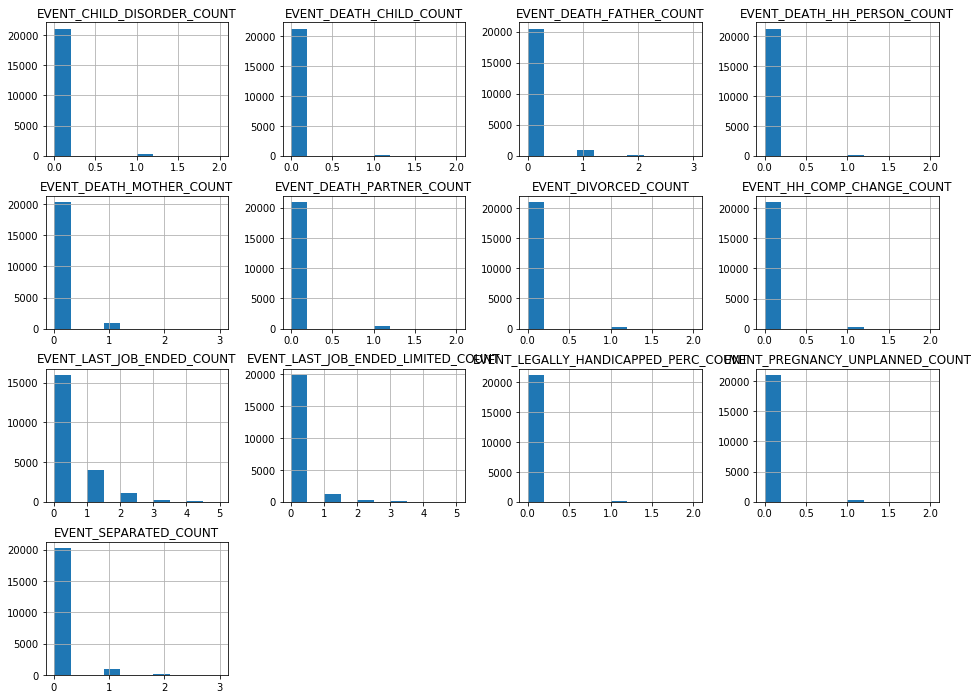

In [4]:
df[['EVENT_' + i + '_COUNT' for i in EVENT_VARIABLES]].hist(figsize=(16, 12), )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C813074208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C812C11EB8>]], dtype=object)

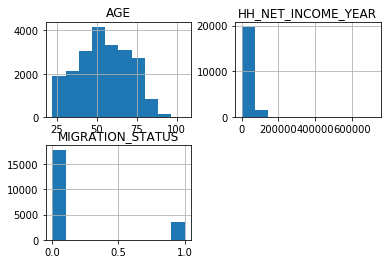

In [5]:
df[CONTROLS].hist()

In [15]:
df = pd.concat([pd.get_dummies(df[CONTROLS]), df.EVENT_CHILD_DISORDER], axis=1)
col_names = list(df.columns)

In [27]:
for i, [false, true] in df.groupby('EVENT_CHILD_DISORDER')[col_names].mean().T.iterrows():
    print(i)
    print(false)
    print(true)

AGE
54.573800037943464
37.4808362369338
HH_NET_INCOME_YEAR
37205.89186112692
37575.052264808364
MIGRATION_STATUS
0.1641529121608803
0.1916376306620209
EDUCATION_GROUPS_ISCED97_[0] in school
0.007446404856763423
0.003484320557491289
EDUCATION_GROUPS_ISCED97_[1] inadequately
0.011572756592676911
0.024390243902439025
EDUCATION_GROUPS_ISCED97_[2] general elementary
0.09718269778030734
0.0975609756097561
EDUCATION_GROUPS_ISCED97_[3] middle vocational
0.4903244166192373
0.3797909407665505
EDUCATION_GROUPS_ISCED97_[4] vocational + Abi
0.05753177765129956
0.10801393728222997
EDUCATION_GROUPS_ISCED97_[5] higher vocational
0.07930184025801555
0.09407665505226481
EDUCATION_GROUPS_ISCED97_[6] higher education
0.25664010624169986
0.2926829268292683
GENDER_Female
0.5223866439005881
0.5574912891986062
GENDER_Male
0.47761335609941186
0.4425087108013937
MARITAL_STATUS_Relationship
0.6429520015177386
0.8013937282229965
MARITAL_STATUS_Single
0.35704799848226143
0.1986062717770035
EVENT_CHILD_DISORDER
0.0